In [1]:
from imckde import *
import time
import importlib
import imckde as imckde
importlib.reload(imckde)
from imckde import *
from sklearn.metrics import precision_score
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import itertools
from assignment_problem import ClusterMapper
from multiclusterkde_original import multiclusterkde_artigo 

In [2]:
import os
PATH_WAVEFORM = os.path.join(os.getcwd(), 'waveform.csv')
PATH_TRIPADVISOR = os.path.join(os.getcwd(), 'tripadvisor_review.csv')

In [3]:
conjunto1 = np.array([[4.97,4.94, 5.07, 4.78, 5.06, 5.01, 4.81, 4.93, 4.90, 5.13, 5.00, 5.14, 5.98, 6.10, 6.00, 5.97, 6.01, 6.04, 5.97, 6.10],
         [1.98, 1.98, 1.93, 1.92, 1.98, 2.00, 1.91, 2.09, 2.05, 1.95, 2.06, 2.13, 3.17, 3.11, 2.74, 2.95, 2.91, 3.05, 2.99, 3.00]])
conjunto1 = np.transpose(conjunto1)


trip_adv = pd.read_csv(PATH_TRIPADVISOR)
trip_adv = trip_adv.drop('User ID',  axis=1)
trip_adv = trip_adv.to_numpy()

from sklearn import datasets
iris = datasets.load_iris()


df_wave = pd.read_table(PATH_WAVEFORM, header = None, sep  = ';')
x_wave =  np.array(df_wave.drop(columns = [21]))
y_wave =  np.array(df_wave[21])

# Iris

## IMCKDE

In [5]:
data = []
for parameters in itertools.product(np.arange(0.5,5,0.5), np.arange(0.5,5,0.1)):
    alpha = parameters[1]
    multiplo = parameters[0]
    try:
        start = time.time()
        mkde = IMCKDE(iris.data, 3, paralelization = False, alpha = alpha, multiplo = multiplo).predict()
        end = time.time()
        data.append(['Algoritmo Proposto', 'Iris', alpha, multiplo, mkde.calcular_metricas("precision", iris.target), mkde.calcular_metricas("silhueta"), (end-start)])
    except:
        data.append(['Algoritmo Proposto', 'Iris', alpha, multiplo, float('nan'), float('nan'), float('nan')])

df = pd.DataFrame(data, columns = ['Algorithm', 'Dataset', 'Alpha', 'Multiplo', 'Precision', 'Silhouette', 'Execution Time'])

c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\Python\Ambiente_UFPR_IC\versao_final_relatorio_IC\multiclusterkde_final_artigo.py:94: RuntimeWarning: divide by zero encountered in divide
  return np.diag(1/(h_matrix.diagonal()))
c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\Python\Ambiente_UFPR_IC\versao_final_relatorio_IC\multiclusterkde_final_artigo.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return -((2*math.pi)**(-n/2))*(1/m)*(np.linalg.det(h_1))**(-1/2)* \
c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\Python\Ambiente_UFPR_IC\versao_final_relatorio_IC\multiclusterkde_final_artigo.py:101: RuntimeWarning: invalid value encountered in matmul
  sum([math.exp(np.matmul((-1/2) * np.transpose((x - dados[i])),np.matmul(h_inv,(x - dados[i])))) for i in range(m)])
c:\Users\paulo.ferreira\OneDrive - 

In [7]:
df.sort_values(['Precision','Silhouette', 'Execution Time'], ascending=[False, False, True])

,Algorithm,Dataset,Alpha,Multiplo,Precision,Silhouette,Execution Time
244,Algoritmo Proposto,Iris,2.4,3.0,0.926771,0.527946,0.103491
243,Algoritmo Proposto,Iris,2.3,3.0,0.926771,0.527946,0.106814
327,Algoritmo Proposto,Iris,1.7,4.0,0.926771,0.527946,0.111008
328,Algoritmo Proposto,Iris,1.8,4.0,0.926771,0.527946,0.113127
197,Algoritmo Proposto,Iris,2.2,2.5,0.926771,0.527946,0.117173
...,...,...,...,...,...,...,...
400,Algoritmo Proposto,Iris,4.5,4.5,NaN,NaN,NaN
401,Algoritmo Proposto,Iris,4.6,4.5,NaN,NaN,NaN
402,Algoritmo Proposto,Iris,4.7,4.5,NaN,NaN,NaN
403,Algoritmo Proposto,Iris,4.8,4.5,NaN,NaN,NaN


In [5]:
%%timeit
IMCKDE(iris.data, 3, paralelization = False, alpha = 2.1, multiplo = 3).predict()

165 ms ± 37.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
mkde = IMCKDE(iris.data, 3, paralelization = False, alpha = 2.1, multiplo = 3).predict()
print(mkde.calcular_metricas("precision", iris.target))

0.9267707082833133


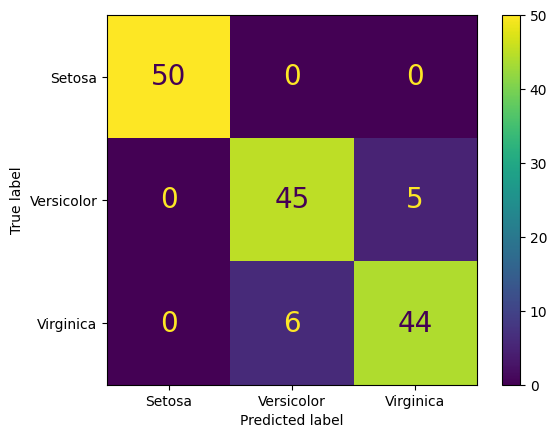

In [4]:
from utils import plot_confusion_matrix
y_true = iris.target
y_pred = mkde.output_array
labels = ['Setosa', 'Versicolor', 'Virginica']
plot_confusion_matrix(y_true, y_pred, labels = labels)

## Kmeans

In [13]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from assignment_problem import ClusterMapper
from sklearn.metrics import precision_score

iris = load_iris()
target = iris.target
n_clusters = 3
dataset = iris.data
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(iris.data)
result = (kmeans.labels_, kmeans.cluster_centers_,)
mapper = ClusterMapper(n_clusters)
maps = mapper.mapeamento_clusters(target, dataset, result)

precision = precision_score(target, maps, average='weighted')
silhouette = silhouette_score(dataset, kmeans.labels_)

print(f'Precision Score: {precision}')
print(f'Silhuette: {silhouette}')

Precision Score: 0.8978562421185372
Silhuette: 0.5511916046195919


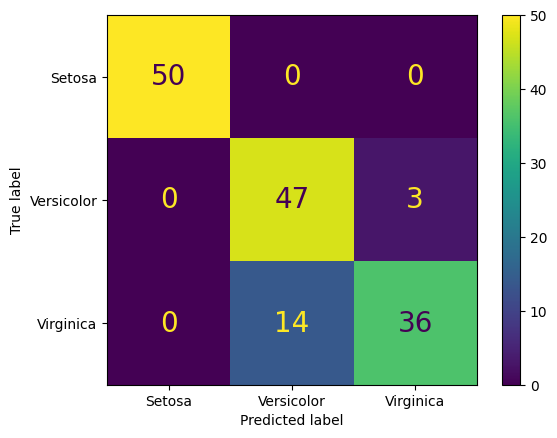

In [7]:
from utils import plot_confusion_matrix
y_true = iris.target
y_pred = maps
labels = ['Setosa', 'Versicolor', 'Virginica']
plot_confusion_matrix(y_true, y_pred, labels = labels)

## Multicluster KDE Original

In [22]:
data = []
for alpha in np.arange(0.5,5,0.1):
    try:
        start = time.time()
        mkde = multiclusterkde_artigo(iris.data, alpha, nc=3)
        end = time.time()
        centroids = mkde['centros']
        labels = mkde['cluster']

        mapper = ClusterMapper(n_clusters=3)
        maps = mapper.mapeamento_clusters(iris.target, iris.data, (labels, centroids))
        
        precisao = precision_score(iris.target, maps, average="weighted")
        sillhuette = silhouette_score(iris.data, mkde['cluster'])
        data.append(['Multiclusterkde', 'Iris', alpha, precisao, sillhuette, (end-start)])
    except:
        data.append(['Multiclusterkde', 'Iris', alpha, float('nan'), float('nan'), float('nan')])

df_iris_original = pd.DataFrame(data, columns = ['Algorithm', 'Dataset', 'Alpha', 'Precision', 'Silhouette', 'Execution Time'])
df = pd.concat([df, df_iris_original])

In [23]:
df[df['Algorithm']=='Algoritmo Proposto'].sort_values(by=['Precision', 'Silhouette', 'Execution Time'], ascending = [False, False, True]).head()

,Algorithm,Dataset,Alpha,Multiplo,Precision,Silhouette,Execution Time
244,Algoritmo Proposto,Iris,2.4,3.0,0.926771,0.527946,0.103491
243,Algoritmo Proposto,Iris,2.3,3.0,0.926771,0.527946,0.106814
327,Algoritmo Proposto,Iris,1.7,4.0,0.926771,0.527946,0.111008
328,Algoritmo Proposto,Iris,1.8,4.0,0.926771,0.527946,0.113127
197,Algoritmo Proposto,Iris,2.2,2.5,0.926771,0.527946,0.117173


In [24]:
df[df['Algorithm']=='Multiclusterkde'].sort_values(by=['Precision', 'Silhouette', 'Execution Time'], ascending = [False, False, True]).head()

,Algorithm,Dataset,Alpha,Multiplo,Precision,Silhouette,Execution Time
7,Multiclusterkde,Iris,1.2,NaN,0.923077,0.555306,0.016639
5,Multiclusterkde,Iris,1.0,NaN,0.898148,0.541516,0.016676
4,Multiclusterkde,Iris,0.9,NaN,0.898148,0.541516,0.032308
3,Multiclusterkde,Iris,0.8,NaN,0.898148,0.541516,0.047891
2,Multiclusterkde,Iris,0.7,NaN,0.898148,0.541516,0.068825


In [25]:
%%timeit
multiclusterkde_artigo(iris.data, 1.2, nc=3)

24.5 ms ± 3.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## DBSCAN

In [26]:
param_grid = {'eps': np.arange(0.3, 2, 0.05), 'min_samples': np.arange(1, 20, 1)}
data = []

for parameter in list(itertools.product(np.arange(0.1, 3, 0.1), np.arange(1, 10, 1))):
    eps = parameter[0]
    min_sample = parameter[1]
    start = time.time()
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(iris.data)
    end = time.time()
    try:
        sillhuette = silhouette_score(iris.data, clustering.labels_)
    except: 
        sillhuette = float('nan')
    data.append(['DBScan', 'Iris', clustering.n_features_in_, eps, min_sample, sillhuette, (end-start)])
df_iris_db = pd.DataFrame(data, columns = ['Algorithm', 'Dataset',  'Number of Clusters', 'Eps', 'Min_Sample', 'Silhouette', 'Execution Time'])

In [27]:
df_iris_db.sort_values(['Silhouette', 'Execution Time'], ascending=[False, True])

,Algorithm,Dataset,Number of Clusters,Eps,Min_Sample,Silhouette,Execution Time
72,DBScan,Iris,4,0.9,1,0.686735,0.000000
73,DBScan,Iris,4,0.9,2,0.686735,0.000000
75,DBScan,Iris,4,0.9,4,0.686735,0.000000
76,DBScan,Iris,4,0.9,5,0.686735,0.000000
77,DBScan,Iris,4,0.9,6,0.686735,0.000000
...,...,...,...,...,...,...,...
195,DBScan,Iris,4,2.2,7,NaN,0.012330
8,DBScan,Iris,4,0.1,9,NaN,0.013657
2,DBScan,Iris,4,0.1,3,NaN,0.014343
203,DBScan,Iris,4,2.3,6,NaN,0.015023


In [24]:
%%timeit
DBSCAN(eps=0.9, min_samples=1).fit(iris.data)

2.6 ms ± 432 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [31]:
db = DBSCAN(eps=0.9, min_samples=1).fit(iris.data)

center1 = np.mean(iris.data[np.where(db.labels_ == 0)], axis = 0)
center2 = np.mean(iris.data[np.where(db.labels_ == 1)], axis = 0)
center3 = np.mean(iris.data[np.where(db.labels_ == 2)], axis = 0)

center1

c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Python_projects\Ambiente_UFPR_IC\ufpr_env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Python_projects\Ambiente_UFPR_IC\ufpr_env\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


array([5.006, 3.428, 1.462, 0.246])

In [32]:
np.array([center1, center2, center3])

array([[5.006, 3.428, 1.462, 0.246],
       [6.262, 2.872, 4.906, 1.676],
       [  nan,   nan,   nan,   nan]])

Precision can not be calculated for DBSCAN because it finds 4 clusters.

## Hierarquical

In [ ]:
start = time.time()
km = KMeans(n_clusters=3, random_state = 0, n_init = 'auto').fit(iris.data)
end = time.time()
print('Hierarquico' , f'Tempo: {round(end-start,3)}', sep = '\n')
print(f'Precisão: {precision_score(iris.target, mapeamento_clusters(iris.target, 3, iris.data,(km.labels_, km.cluster_centers_)), average="weighted")}',end = '\n')
print(f'Silhuette:', silhouette_score(iris.data, km.labels_))
print('tempo', end-start)

In [33]:
for link in ["ward", "complete", "average", "single"]:
    start = time.time()
    clustering = AgglomerativeClustering(n_clusters = 3, linkage = link).fit(iris.data)
    print(f'Precisão: {precision_score(iris.target, mapeamento_clusters(iris.target, 3, iris.data,(km.labels_, km.cluster_centers_)), average="weighted")}',end = '\n')
    end = time.time()
    print(f'Hierarquico linkage={link}' , f'Tempo: {round(end-start,3)}', sep = '\n')
    print(f'Silhueta: {silhouette_score(iris.data, clustering.labels_)}', end = '\n')
    print('time:', end-start, end = '\n\n')

Hierarquico linkage=ward
Tempo: 0.002
Silhueta: 0.5543236611296419
time: 0.00246429443359375

Hierarquico linkage=complete
Tempo: 0.0
Silhueta: 0.5135953221192214
time: 0.0

Hierarquico linkage=average
Tempo: 0.0
Silhueta: 0.5541608580282851
time: 0.0

Hierarquico linkage=single
Tempo: 0.0
Silhueta: 0.5121107753649307
time: 0.0



In [5]:
agnes = AgglomerativeClustering(n_clusters = 3, linkage = 'ward').fit(iris.data)

center1 = np.mean(iris.data[np.where(agnes.labels_ == 0)], axis = 0)
center2 = np.mean(iris.data[np.where(agnes.labels_ == 1)], axis = 0)
center3 = np.mean(iris.data[np.where(agnes.labels_ == 2)], axis = 0)

centroids = np.array([center1, center2, center3])
centroids

array([[5.9203125 , 2.7515625 , 4.4203125 , 1.434375  ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.86944444, 3.08611111, 5.76944444, 2.10555556]])

In [9]:
mapper = ClusterMapper(number_of_clusters=3)
maps = mapper.mapeamento_clusters(iris.target, iris.data, (agnes.labels_, centroids))
precision_score(iris.target, maps, average="weighted")

0.9126157407407408

In [45]:
%%timeit
AgglomerativeClustering(n_clusters = 3, linkage = 'ward').fit(iris.data)

651 µs ± 61.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Wave Generator

## MulticlusterKDE

In [ ]:
data = []
for alpha in np.arange(0.5,5,0.1):
    try:
        start = time.time()
        mkde = multiclusterkde_artigo(x_wave, alpha, nc=3)
        end = time.time()
        centroids = mkde['centros']
        labels = mkde['cluster']

        mapper = ClusterMapper(n_clusters=3)
        maps = mapper.mapeamento_clusters(y_wave, x_wave, (labels, centroids))
        
        precisao = precision_score(y_wave, maps, average="weighted")
        sillhuette = silhouette_score(x_wave, mkde['cluster'])
        data.append(['Multiclusterkde', 'Iris', alpha, precisao, sillhuette, (end-start)])
    except:
        data.append(['Multiclusterkde', 'Iris', alpha, float('nan'), float('nan'), float('nan')])

df_iris_original = pd.DataFrame(data, columns = ['Algorithm', 'Dataset', 'Alpha', 'Precision', 'Silhouette', 'Execution Time'])
df = pd.concat([df, df_iris_original])

## IMCKDE

In [46]:
data = []
for parameters in itertools.product(np.arange(0.5,5,0.5), np.arange(0.5,5,0.1)):
    alpha = parameters[1]
    multiplo = parameters[0]
    try:
        start = time.time()
        mkde = IMCKDE(x_wave, 3, paralelization = False, alpha = alpha, multiplo = multiplo).predict()
        end = time.time()
        data.append(['Algoritmo Proposto', 'Wave Generator', alpha, multiplo, mkde.calcular_metricas("precision", y_wave), mkde.calcular_metricas("silhueta"), (end-start)])
    except:
        data.append(['Algoritmo Proposto', 'Wave Generator', alpha, multiplo, float('nan'), float('nan'), float('nan')])

df_wave = pd.DataFrame(data, columns = ['Algorithm', 'Dataset', 'Alpha', 'Multiplo', 'Precision', 'Silhouette', 'Execution Time'])

df = pd.concat([df, df_wave])

c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\Python\Ambiente_UFPR_IC\versao_final_relatorio_IC\multiclusterkde_final_artigo.py:94: RuntimeWarning: divide by zero encountered in divide
  return np.diag(1/(h_matrix.diagonal()))
c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\Python\Ambiente_UFPR_IC\versao_final_relatorio_IC\multiclusterkde_final_artigo.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return -((2*math.pi)**(-n/2))*(1/m)*(np.linalg.det(h_1))**(-1/2)* \
c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\Python\Ambiente_UFPR_IC\versao_final_relatorio_IC\multiclusterkde_final_artigo.py:101: RuntimeWarning: invalid value encountered in matmul
  sum([math.exp(np.matmul((-1/2) * np.transpose((x - dados[i])),np.matmul(h_inv,(x - dados[i])))) for i in range(m)])
c:\Users\paulo.ferreira\OneDrive - 

In [48]:
df[(df['Algorithm']=='Algoritmo Proposto') & (df['Dataset']=='Wave Generator')].sort_values(by=['Precision', 'Silhouette', 'Execution Time'], ascending = [False, False, True]).head()

,Algorithm,Dataset,Alpha,Multiplo,Precision,Silhouette,Execution Time
2,Algoritmo Proposto,Wave Generator,0.7,0.5,0.599567,0.123076,0.317094
5,Algoritmo Proposto,Wave Generator,1.0,0.5,0.599567,0.123076,0.350186
8,Algoritmo Proposto,Wave Generator,1.3,0.5,0.599567,0.123076,0.353328
0,Algoritmo Proposto,Wave Generator,0.5,0.5,0.599567,0.123076,0.370903
9,Algoritmo Proposto,Wave Generator,1.4,0.5,0.599567,0.123076,0.373096


In [50]:
%%timeit
MulticlusterKDE(x_wave, 3, paralelization = False, alpha = 0.7, multiplo = 0.5).predict()

259 ms ± 9.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
df[(df['Algorithm']=='Multiclusterkde') & (df['Dataset']=='Wave Generator')].sort_values(by=['Precision', 'Silhouette', 'Execution Time'], ascending = [False, False, True]).head()

,Algorithm,Dataset,Alpha,Multiplo,Precision,Silhouette,Execution Time
44,Multiclusterkde,Wave Generator,4.9,NaN,0.495855,0.233106,12.024112
38,Multiclusterkde,Wave Generator,4.3,NaN,0.495855,0.233106,12.254685
42,Multiclusterkde,Wave Generator,4.7,NaN,0.495855,0.233106,12.328895
14,Multiclusterkde,Wave Generator,1.9,NaN,0.495855,0.233106,12.399650
5,Multiclusterkde,Wave Generator,1.0,NaN,0.495855,0.233106,12.436387


In [54]:
%%timeit
multiclusterkde_artigo(x_wave, 4.9, nc=3)

11.8 s ± 1.33 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## K-means

In [55]:
#Iris
start = time.perf_counter()
km = KMeans(n_clusters=3, random_state = 0, n_init = 'auto').fit(x_wave)
end = time.perf_counter()


kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(y_wave)
result = (kmeans.labels_, kmeans.cluster_centers_,)
mapper = ClusterMapper(n_clusters)
maps = mapper.mapeamento_clusters(target, dataset, result)
precision = precision_score(target, maps, average='weighted')
silhouette = silhouette_score(dataset, kmeans.labels_)

print('Kmeans puro' , f'Tempo: {round(end-start,3)}', sep = '\n')
print(f'Precision: {precision}', end = '\n')
print(f'Silhuette:', silhouette_score(x_wave, km.labels_))
print('Time:', end-start)

Kmeans puro
Tempo: 0.025
Precisão: 0.36543478321579975
Silhuette: 0.25182688282553395
Time: 0.024997472763061523


In [56]:
%%timeit
KMeans(n_clusters=3, random_state = 0, n_init = 'auto').fit(x_wave)

12.9 ms ± 3.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## DBSCAN

In [57]:
param_grid = {'eps': np.arange(0.3, 2, 0.05), 'min_samples': np.arange(1, 20, 1)}
data = []

for parameter in list(itertools.product(np.arange(2, 6, 0.1), np.arange(5, 30, 1))):
    eps = parameter[0]
    min_sample = parameter[1]
    start = time.time()
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(x_wave)
    end = time.time()
    try:
        sillhuette = silhouette_score(x_wave, clustering.labels_)
    except: 
        sillhuette = float('nan')
        #break
    data.append(['DBScan', 'Wave', clustering.n_features_in_, eps, min_sample, sillhuette, (end-start)])
df_iris_db = pd.DataFrame(data, columns = ['Algorithm', 'Dataset',  'Number of Clusters', 'Eps', 'Min_Sample', 'Silhouette', 'Execution Time'])

In [58]:
df_iris_db[df_iris_db['Number of Clusters']==3]

,Algorithm,Dataset,Number of Clusters,Eps,Min_Sample,Silhouette,Execution Time


In [59]:
df_iris_db.sort_values(['Silhouette', 'Execution Time'], ascending=[False, True])

,Algorithm,Dataset,Number of Clusters,Eps,Min_Sample,Silhouette,Execution Time
941,DBScan,Wave,21,5.7,21,0.135825,0.113980
935,DBScan,Wave,21,5.7,15,0.135825,0.115358
949,DBScan,Wave,21,5.7,29,0.135825,0.115631
947,DBScan,Wave,21,5.7,27,0.135825,0.117478
933,DBScan,Wave,21,5.7,13,0.135825,0.119780
...,...,...,...,...,...,...,...
998,DBScan,Wave,21,5.9,28,NaN,0.226154
984,DBScan,Wave,21,5.9,14,NaN,0.237634
993,DBScan,Wave,21,5.9,23,NaN,0.251302
449,DBScan,Wave,21,3.7,29,NaN,0.264229


In [60]:
%%timeit
DBSCAN(eps=5.7, min_samples=21).fit(x_wave)

123 ms ± 2.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## AGNES

In [44]:
start = time.time()
clustering = AgglomerativeClustering(n_clusters = 3).fit(x_wave)
end = time.time()
print('Hierarquico' , f'Tempo: {round(end-start,3)}', sep = '\n')
print(f'Silhueta: {silhouette_score(x_wave, clustering.labels_)}', end = '\n')
print('time:', end-start)

Hierarquico
Tempo: 2.438
Silhueta: 0.18966400265188382
time: 2.438206911087036


In [61]:
for link in ["ward", "complete", "average", "single"]:
    start = time.time()
    clustering = AgglomerativeClustering(n_clusters = 3, linkage=link).fit(x_wave)
    end = time.time()
    print(f'Hierarquicom linkage={link}' , f'Tempo: {round(end-start,3)}', sep = '\n')
    print(f'Silhueta: {silhouette_score(x_wave, clustering.labels_)}', end = '\n')
    print('time:', end-start, end='\n\n')

Hierarquicom linkage=ward
Tempo: 0.856
Silhueta: 0.18966400265188382
time: 0.8562588691711426

Hierarquicom linkage=complete
Tempo: 0.992
Silhueta: 0.22088674710758555
time: 0.9917788505554199

Hierarquicom linkage=average
Tempo: 1.021
Silhueta: 0.22497302784419193
time: 1.0210683345794678

Hierarquicom linkage=single
Tempo: 0.36
Silhueta: -0.06935294835406851
time: 0.3601071834564209



In [62]:
%%timeit
AgglomerativeClustering(n_clusters = 3, linkage='average').fit(x_wave)

807 ms ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
agnes = AgglomerativeClustering(n_clusters = 3, linkage = 'average').fit(x_wave)

center1 = np.mean(x_wave[np.where(agnes.labels_ == 0)], axis = 0)
center2 = np.mean(x_wave[np.where(agnes.labels_ == 1)], axis = 0)
center3 = np.mean(x_wave[np.where(agnes.labels_ == 2)], axis = 0)

centroids = np.array([center1, center2, center3])
centroids

array([[-0.00780077,  0.65805582,  1.3213282 ,  1.97685756,  2.63598171,
         3.55071222,  4.48500962,  4.03639557,  3.67045236,  3.33684793,
         3.0025794 ,  2.21837344,  1.36065929,  1.15589028,  0.98914822,
         0.67444177,  0.33851299,  0.24557267,  0.18129933,  0.06326275,
        -0.05774783],
       [ 0.06067941,  0.01031847,  0.10840764,  0.08531847,  0.13430998,
         1.07204883,  1.95287686,  2.73237792,  3.55971338,  4.50754777,
         5.49069002,  4.64326964,  3.89204883,  3.10711253,  2.38117834,
         1.39912951,  0.44452229,  0.33562633,  0.2246603 ,  0.13686837,
         0.03703822],
       [-0.00769192,  0.15988384,  0.25977273,  0.38877273,  0.47997475,
         0.80721212,  1.08564141,  1.17909596,  1.2020101 ,  1.90063636,
         2.66233333,  3.07289394,  3.48524242,  3.99713131,  4.51506061,
         3.67830808,  2.8045404 ,  2.10941919,  1.37325253,  0.77076263,
        -0.011     ]])

In [13]:
mapper = ClusterMapper(number_of_clusters=3)
maps = mapper.mapeamento_clusters(y_wave, x_wave, (agnes.labels_, centroids))
print(f'Precision Score: {precision_score(y_wave, maps, average="weighted")}')

Precision Score: 0.5699887622929638


# Trip Advisor

## IMCKDE

In [63]:
data = []
for parameters in list(itertools.product(np.arange(0.5,5,0.5), np.arange(0.5,7.5,0.1), range(2,6))):
    alpha = parameters[1]
    multiplo = parameters[0]
    n_clusters = parameters[2]
    try:
        start = time.perf_counter()
        mkde = IMCKDE(trip_adv, n_clusters, paralelization = False, alpha = alpha, multiplo = multiplo).predict()        
        end = time.perf_counter()
        data.append(['IMCKDE', 'Trip Advisor', n_clusters, alpha, multiplo, float('nan'), mkde.calcular_metricas("silhueta"), (end-start)])
    except:
        data.append(['IMCKDE', 'Trip Advisor', n_clusters, alpha, multiplo, float('nan'), float('nan'), float('nan')])

df_trip = pd.DataFrame(data, columns = ['Algorithm', 'Dataset', 'n_clusters', 'Alpha', 'Multiplo', 'Precision', 'Silhouette', 'Execution Time'])

#df = pd.concat([df, df_trip])

c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\Python\Ambiente_UFPR_IC\versao_final_relatorio_IC\multiclusterkde_final_artigo.py:94: RuntimeWarning: divide by zero encountered in divide
  return np.diag(1/(h_matrix.diagonal()))
c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\Python\Ambiente_UFPR_IC\versao_final_relatorio_IC\multiclusterkde_final_artigo.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return -((2*math.pi)**(-n/2))*(1/m)*(np.linalg.det(h_1))**(-1/2)* \
c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\Python\Ambiente_UFPR_IC\versao_final_relatorio_IC\multiclusterkde_final_artigo.py:101: RuntimeWarning: invalid value encountered in matmul
  sum([math.exp(np.matmul((-1/2) * np.transpose((x - dados[i])),np.matmul(h_inv,(x - dados[i])))) for i in range(m)])
c:\Users\paulo.ferreira\OneDrive - 

In [27]:
df_trip.sort_values(by=['Silhouette', 'Execution Time'], ascending = [False, True])

,Algorithm,Dataset,n_clusters,Alpha,Multiplo,Precision,Silhouette,Execution Time
2509,Algoritmo Proposto,Trip Advisor,3,7.2,4.5,NaN,0.442436,1.040553
2507,Algoritmo Proposto,Trip Advisor,5,7.1,4.5,NaN,0.442436,1.056488
2505,Algoritmo Proposto,Trip Advisor,3,7.1,4.5,NaN,0.442436,1.065791
2508,Algoritmo Proposto,Trip Advisor,2,7.2,4.5,NaN,0.442436,1.130387
2504,Algoritmo Proposto,Trip Advisor,2,7.1,4.5,NaN,0.442436,1.134646
...,...,...,...,...,...,...,...,...
2515,Algoritmo Proposto,Trip Advisor,5,7.3,4.5,NaN,NaN,NaN
2516,Algoritmo Proposto,Trip Advisor,2,7.4,4.5,NaN,NaN,NaN
2517,Algoritmo Proposto,Trip Advisor,3,7.4,4.5,NaN,NaN,NaN
2518,Algoritmo Proposto,Trip Advisor,4,7.4,4.5,NaN,NaN,NaN


In [14]:
%%timeit
IMCKDE(trip_adv, 3, paralelization = False, alpha = 7.2, multiplo = 4.5).predict()

c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Python_projects\Ambiente_UFPR_IC\versao_final_relatorio_IC\imckde.py:94: RuntimeWarning: divide by zero encountered in divide
  return np.diag(1/(h_matrix.diagonal()))
c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Python_projects\Ambiente_UFPR_IC\versao_final_relatorio_IC\imckde.py:100: RuntimeWarning: divide by zero encountered in scalar power
  return -((2*math.pi)**(-n/2))*(1/m)*(np.linalg.det(h_1))**(-1/2)* \
c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Python_projects\Ambiente_UFPR_IC\versao_final_relatorio_IC\imckde.py:101: RuntimeWarning: invalid value encountered in matmul
  sum([math.exp(np.matmul((-1/2) * np.transpose((x - dados[i])),np.matmul(h_inv,(x - dados[i])))) for i in range(m)])
c:\Users\paulo.ferreira\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Python_projects\Ambiente_UFPR_IC\versao_f

988 ms ± 256 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
IMCKDE(trip_adv, 2, paralelization = False, alpha = 7.3, multiplo = 4).predict()

883 ms ± 269 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## MulticlusterKDE

In [4]:
data = []
for parameter in itertools.product(np.arange(0.5,7.5,0.1), range(2,11)):
    alpha = parameter[0]
    n_cluster = parameter[1]
    try:
        start = time.time()
        mkde = multiclusterkde_artigo(trip_adv, alpha, nc=n_cluster)
        end = time.time()
        centroids = mkde['centros']
        labels = mkde['cluster']
        precisao = float('nan')
        sillhuette = silhouette_score(trip_adv, mkde['cluster'])
        data.append(['Multiclusterkde', 'Trip Advisor', n_cluster, alpha, precisao, sillhuette, (end-start)])
    except:
        data.append(['Multiclusterkde', 'Trip Advisor', n_cluster, alpha, float('nan'), float('nan'), float('nan')])

df_tripadvisor_original = pd.DataFrame(data, columns = ['Algorithm', 'Dataset', 'n_cluster', 'Alpha', 'Precision', 'Silhouette', 'Execution Time'])
#df = pd.concat([df, df_tripadvisor_original])

In [5]:
df_tripadvisor_original.sort_values(by=['Silhouette', 'Execution Time'], ascending = [False, True]).head()

,Algorithm,Dataset,n_cluster,Alpha,Precision,Silhouette,Execution Time
277,Multiclusterkde,Trip Advisor,9,3.5,NaN,0.218644,0.625384
276,Multiclusterkde,Trip Advisor,8,3.5,NaN,0.218638,0.630817
295,Multiclusterkde,Trip Advisor,9,3.7,NaN,0.218530,0.400287
294,Multiclusterkde,Trip Advisor,8,3.7,NaN,0.218521,0.400986
278,Multiclusterkde,Trip Advisor,10,3.5,NaN,0.205930,0.644842


In [6]:
%%timeit
multiclusterkde_artigo(trip_adv, 3.5, nc=9)

1.01 s ± 256 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
multiclusterkde_artigo(trip_adv, alpha, nc=5)

In [47]:
df_trip[(df_trip['Algorithm']=='Algoritmo Proposto') & (df_trip['Dataset']=='Trip Advisor')].sort_values(by=['Silhouette', 'Execution Time'], ascending = [False, True]).head()

,Algorithm,Dataset,Alpha,Multiplo,Precision,Silhouette,Execution Time
556,Algoritmo Proposto,Trip Advisor,7.1,4.0,NaN,0.442436,3.164008
555,Algoritmo Proposto,Trip Advisor,7.0,4.0,NaN,0.442436,3.214324
558,Algoritmo Proposto,Trip Advisor,7.3,4.0,NaN,0.442436,3.291092
559,Algoritmo Proposto,Trip Advisor,7.4,4.0,NaN,0.442436,3.644867
557,Algoritmo Proposto,Trip Advisor,7.2,4.0,NaN,0.442436,3.744452


In [49]:
df_tripadvisor_original[(df_tripadvisor_original['Algorithm']=='Multiclusterkde') & (df_tripadvisor_original['Dataset']=='Trip Advisor')].sort_values(by=['Silhouette', 'Execution Time'], ascending = [False, True]).head()

,Algorithm,Dataset,Alpha,Precision,Silhouette,Execution Time
29,Multiclusterkde,Trip Advisor,3.4,NaN,0.149082,2.500902
30,Multiclusterkde,Trip Advisor,3.5,NaN,0.148646,1.398887
23,Multiclusterkde,Trip Advisor,2.8,NaN,0.147214,2.955608
32,Multiclusterkde,Trip Advisor,3.7,NaN,0.146409,0.675298
26,Multiclusterkde,Trip Advisor,3.1,NaN,0.144615,2.466286


## k-means

In [14]:
for n_cluster in range(2,11):
    start = time.time()
    km = KMeans(n_clusters=n_cluster, random_state = 0, n_init = 'auto').fit(trip_adv)
    end = time.time()
    print(f'Kmeans puro, ncluster={n_cluster}' , f'Tempo: {round(end-start,3)}', sep = '\n')
    print(f'Silhueta: {silhouette_score(trip_adv, km.labels_)}', end = '\n\n')

Kmeans puro, ncluster=2
Tempo: 0.096
Silhueta: 0.30085279300986595

Kmeans puro, ncluster=3
Tempo: 0.082
Silhueta: 0.250147188484459

Kmeans puro, ncluster=4
Tempo: 0.038
Silhueta: 0.1578878899202057

Kmeans puro, ncluster=5
Tempo: 0.035
Silhueta: 0.16149812402219796

Kmeans puro, ncluster=6
Tempo: 0.022
Silhueta: 0.13379983945828783

Kmeans puro, ncluster=7
Tempo: 0.043
Silhueta: 0.16525128213359055

Kmeans puro, ncluster=8
Tempo: 0.029
Silhueta: 0.16531921387051038

Kmeans puro, ncluster=9
Tempo: 0.028
Silhueta: 0.14215268760759697

Kmeans puro, ncluster=10
Tempo: 0.023
Silhueta: 0.14591277374627845



In [15]:
%%timeit
KMeans(n_clusters=2, random_state = 0, n_init = 'auto').fit(trip_adv)

7.86 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## DBSCAN

In [17]:
param_grid = {'eps': np.arange(0.3, 2, 0.1), 'min_samples': np.arange(1, 20, 1)}
data = []

for parameter in list(itertools.product(np.arange(2, 6, 0.1), np.arange(5, 30, 1))):
    eps = parameter[0]
    min_sample = parameter[1]
    start = time.perf_counter()
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(trip_adv)
    end = time.perf_counter()
    try:
        sillhuette = silhouette_score(trip_adv, clustering.labels_)
    except: 
        sillhuette = float('nan')
        #break
    data.append(['DBScan', 'Trip Advisor', clustering.n_features_in_, eps, min_sample, sillhuette, (end-start)])
df_trip_db = pd.DataFrame(data, columns = ['Algorithm', 'Dataset',  'Number of Clusters', 'Eps', 'Min_Sample', 'Silhouette', 'Execution Time'])

In [19]:
df_trip_db.sort_values(['Silhouette', 'Execution Time'], ascending = [False, True])

,Algorithm,Dataset,Number of Clusters,Eps,Min_Sample,Silhouette,Execution Time
14,DBScan,Trip Advisor,10,2.0,19,0.512942,0.058389
45,DBScan,Trip Advisor,10,2.1,25,0.512942,0.062771
69,DBScan,Trip Advisor,10,2.2,24,0.512942,0.064215
70,DBScan,Trip Advisor,10,2.2,25,0.512942,0.064845
15,DBScan,Trip Advisor,10,2.0,20,0.512942,0.065220
...,...,...,...,...,...,...,...
291,DBScan,Trip Advisor,10,3.1,21,NaN,0.175413
328,DBScan,Trip Advisor,10,3.3,8,NaN,0.177978
277,DBScan,Trip Advisor,10,3.1,7,NaN,0.194432
314,DBScan,Trip Advisor,10,3.2,19,NaN,0.258578


In [20]:
%%timeit
DBSCAN(eps = 2, min_samples = 19).fit(trip_adv)

52.3 ms ± 2.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [153]:
clustering = DBSCAN(eps = 1.5).fit(trip_adv)
silhouette_score(trip_adv, clustering.labels_)

0.44076314857043747

In [156]:
clustering = DBSCAN(eps = 1.5).fit(trip_adv)
np.unique(clustering.labels_)

array([-1,  0], dtype=int64)

In [154]:
%%timeit
clustering = DBSCAN(eps = 1.5).fit(trip_adv)

78.2 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
for param in itertools.product(range(2,10), ["ward", "complete", "average", "single"]):
    ncluster = param[0]
    link = param[1]
    start = time.time()
    clustering = AgglomerativeClustering(n_clusters = ncluster, linkage=link).fit(trip_adv)
    end = time.time()
    print(f'Hierarquico, n_cluster = {ncluster}, link = {link}' , f'Tempo: {round(end-start,3)}', sep = '\n')
    print(f'Silhueta: {silhouette_score(trip_adv, clustering.labels_)}', end = '\n')
    print('time:', end-start, end = '\n\n')

Hierarquico, n_cluster = 2, link = ward
Tempo: 0.038
Silhueta: 0.27931282832051946
time: 0.037834882736206055

Hierarquico, n_cluster = 2, link = complete
Tempo: 0.024
Silhueta: 0.27486384544141035
time: 0.024124622344970703

Hierarquico, n_cluster = 2, link = average
Tempo: 0.032
Silhueta: 0.41066869525048516
time: 0.03151988983154297

Hierarquico, n_cluster = 2, link = single
Tempo: 0.012
Silhueta: 0.41066869525048516
time: 0.012280464172363281

Hierarquico, n_cluster = 3, link = ward
Tempo: 0.028
Silhueta: 0.21869392177917943
time: 0.0281832218170166

Hierarquico, n_cluster = 3, link = complete
Tempo: 0.036
Silhueta: 0.15577203653564992
time: 0.03578448295593262

Hierarquico, n_cluster = 3, link = average
Tempo: 0.028
Silhueta: 0.2834537675733315
time: 0.027738571166992188

Hierarquico, n_cluster = 3, link = single
Tempo: 0.018
Silhueta: 0.3851109482909316
time: 0.017938852310180664

Hierarquico, n_cluster = 4, link = ward
Tempo: 0.035
Silhueta: 0.13376333330881557
time: 0.035275220

In [25]:
%%timeit
AgglomerativeClustering(n_clusters = 2, linkage='single').fit(trip_adv)

12.6 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
